# **2/2568 FRA501: Pattern Recognition - HW1 Clustering and Regression**
**Member**
- Pavaris Asawakijtananont

In [144]:
import pandas as pd
import numpy as np
import math
import os
import copy
import matplotlib.pyplot as plt

### **Data Exploration**

In [145]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

**Train Set**

In [146]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [148]:
print(f"Train set shape {train.shape}")
train.describe()


Train set shape (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- From the table this dataset contain with 11 Features with 891 sample(row), diverse of input data type can be seen that this dataset including, categorical feature and numerical feature. and `NaN` also included in this dataset.
- Although dataset contain 12 column, usable features are only 10 feature because of another 2 columns are number of row and passenger number.      

**Test Set**

In [149]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [150]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [151]:
print(f"Test set shape {test.shape}")
train.describe()


Test set shape (418, 11)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- In test set, we can see the dataset with 11 column and 418 sample. In dataset is not included with `Survived`, and `missing value (NaN)` can be seen too
- In `Age` column we can see that it including with **float number  (row 415)** 

> **`IMPORTANT NOTE`** : we will not use **Test set** because it lack of **Target Value `Survived`** 

In [152]:
print(f"Train set shape {train.shape} \n Test set shape {test.shape}")

Train set shape (891, 12) 
 Test set shape (418, 11)


- We can use the `.head()` to see the first 5 row, and `.tail()` to see the last 5 row in dataset to observe dataset roughly before deep into each feature for Feature engineering in next part
-  Moreover, `.decribe()` can be used for see the basic statistic of our data, to preprocess in next part.
- Feature type is summarize in following table. This table not include the passenger number

| Variable  | Definition                                   | Key                                   |  Feature Type
|-----------|----------------------------------------------|----------------------------------------|------------------------------- |
| Survived  | Survival                                     | 0 = No, 1 = Yes                         | Nominal Categorical           |
| Pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd               | Ordinal Categorical           |
| Name      | Passenger name                               |                                        | Nominal Categorical            |
| PassengerId    | Passenger Id                             |                                        | Ordinal Categorical           |
| Sex       | Sex                                          |                                        | Nominal Categorical            |
| Age       | Age in years                                 |                                        | Numerical                      |
| SibSp     | # of siblings / spouses aboard the Titanic   |                                        | Numerical                      |
| Parch     | # of parents / children aboard the Titanic   |                                        | Numerical                      |
| Ticket    | Ticket number                                |                                        | Nominal Categorical            |
| Fare      | Passenger fare                               |                                        | Numerical                      |
| Cabin     | Cabin number                                 |                                        | Nominal Categorical            |
| Embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton | Nominal Categorical    |

- From roughly data explorationm, we can identify useless feature in this dataset. Firstly, `PassengerId` should not be effect to `Survived` because it just the identity number, which is unique for all passenger. Secondly, `Name` is similar to `PassengerId`, it unique for all passenger. (If we not a reaper, we don't care the names)
- Meanwhile, `Ticket` is categorical feature, should be check for unique number of this feature preventing high dimensional feature.

In [153]:
print(f"Number of Unique value in Ticket column : {len(train['Ticket'].unique())}")

Number of Unique value in Ticket column : 681


- `Ticket` has 681 unique value and this feature is not ordinal number, can be sort in number. We consider to remove `Ticket` from our dataset

- other categorical feature should be test too, for define very unique value 

In [154]:

for i in ['Pclass' , 'Sex' , 'Cabin' , 'Embarked' , 'Survived']:
    print(f"Number of Unique value in {i} column : {len(train[i].unique())}")

Number of Unique value in Pclass column : 3
Number of Unique value in Sex column : 2
Number of Unique value in Cabin column : 148
Number of Unique value in Embarked column : 4
Number of Unique value in Survived column : 2


- It should be noted that `Cabin` also has unique value, compared to other categorical feature contain only 2-4 group
- `Cabin` feature must be plot to consider the distribution before drop it out.

In [155]:
train0 = train.drop(columns=["Name","PassengerId","Ticket"])
test0 = test.drop(columns=["Name","PassengerId","Ticket"])

- Finalist features are summarize in below tables

| Variable  | Definition                                   | Key                                   |  Feature Type
|-----------|----------------------------------------------|----------------------------------------|------------------------------- |
| Age       | Age in years                                 |                                        | Numerical                      |
| SibSp     | # of siblings / spouses aboard the Titanic   |                                        | Numerical / Ordinal Categorical|
| Parch     | # of parents / children aboard the Titanic   |                                        | Numerical / Ordinal Categorical|
| Fare      | Passenger fare                               |                                        | Numerical                      |
| Pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd               | Ordinal Categorical           |
| Sex       | Sex                                          |                                        | Nominal Categorical            |
| Cabin     | Cabin number                                 |                                        | Nominal Categorical            |
| Embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton | Nominal Categorical    |
| Survived  | Survival                                     | 0 = No, 1 = Yes                         | Nominal Categorical           |


- We have 4 feature of numberical, 6 feature of categorical(include target `Survived`) following the table (`P class` was consider to be categorical because difference type of `Ticket` can be effect to `Survived` (**e.g**. Type 2 can effect to Survived the most))

---

#### **Data Exploration : Plotting**

In [156]:
# num_fea = train0.describe().columns.tolist()
# num_fea = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
num_fea = ['Age','SibSp','Parch','Fare']
cat_fea = ['Pclass' , 'Sex' , 'Cabin' , 'Embarked' , 'Survived']
print(f"Numericl Feature :{num_fea}")

Numericl Feature :['Age', 'SibSp', 'Parch', 'Fare']


##### **Training**

 **Numerical**

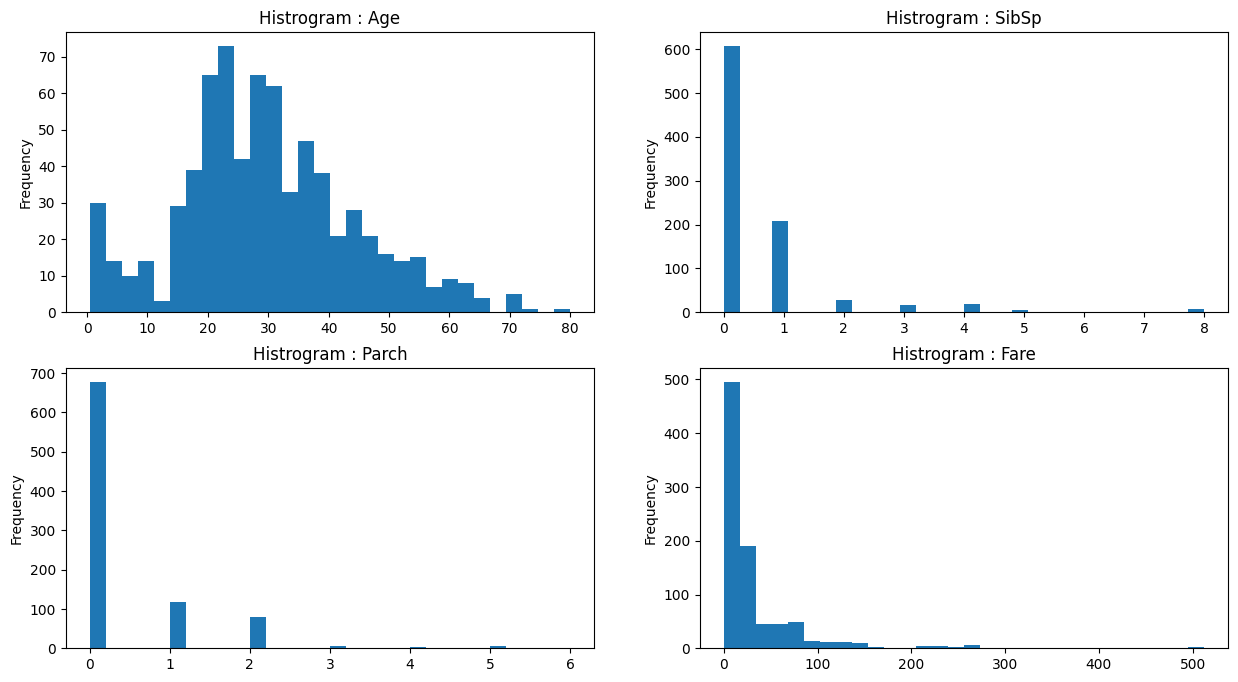

In [180]:
plt.figure(figsize=(15, 8))   # width, height in inches
for i in range(len(num_fea)):
    plt.subplot(2,2,i+1)
    train[num_fea[i]].plot(kind='hist', bins=30,title=f"Histrogram : {num_fea[i]}")
    # plt.plot(num_k,value_to_plot[i],'*-', markersize=10)
    # plt.title(title[i])
    

- **`Age`** : The distribution is roughly bell-shaped with a slight right skew. Most passengers are young adults, and there are some infants and elderly passengers.
- **`SibP`** : Highly right-skewed. Most passengers traveled without siblings or spouses (value 0), with a few large-family `outliers`. 
- **`Parch`** : Also right-skewed. Most passengers traveled without parents or children, and higher values are rare.
- **`Fare`** : Strongly right-skewed. Most fares are low, while a small number of passengers paid very high prices. `outliers`

 **Categorical**

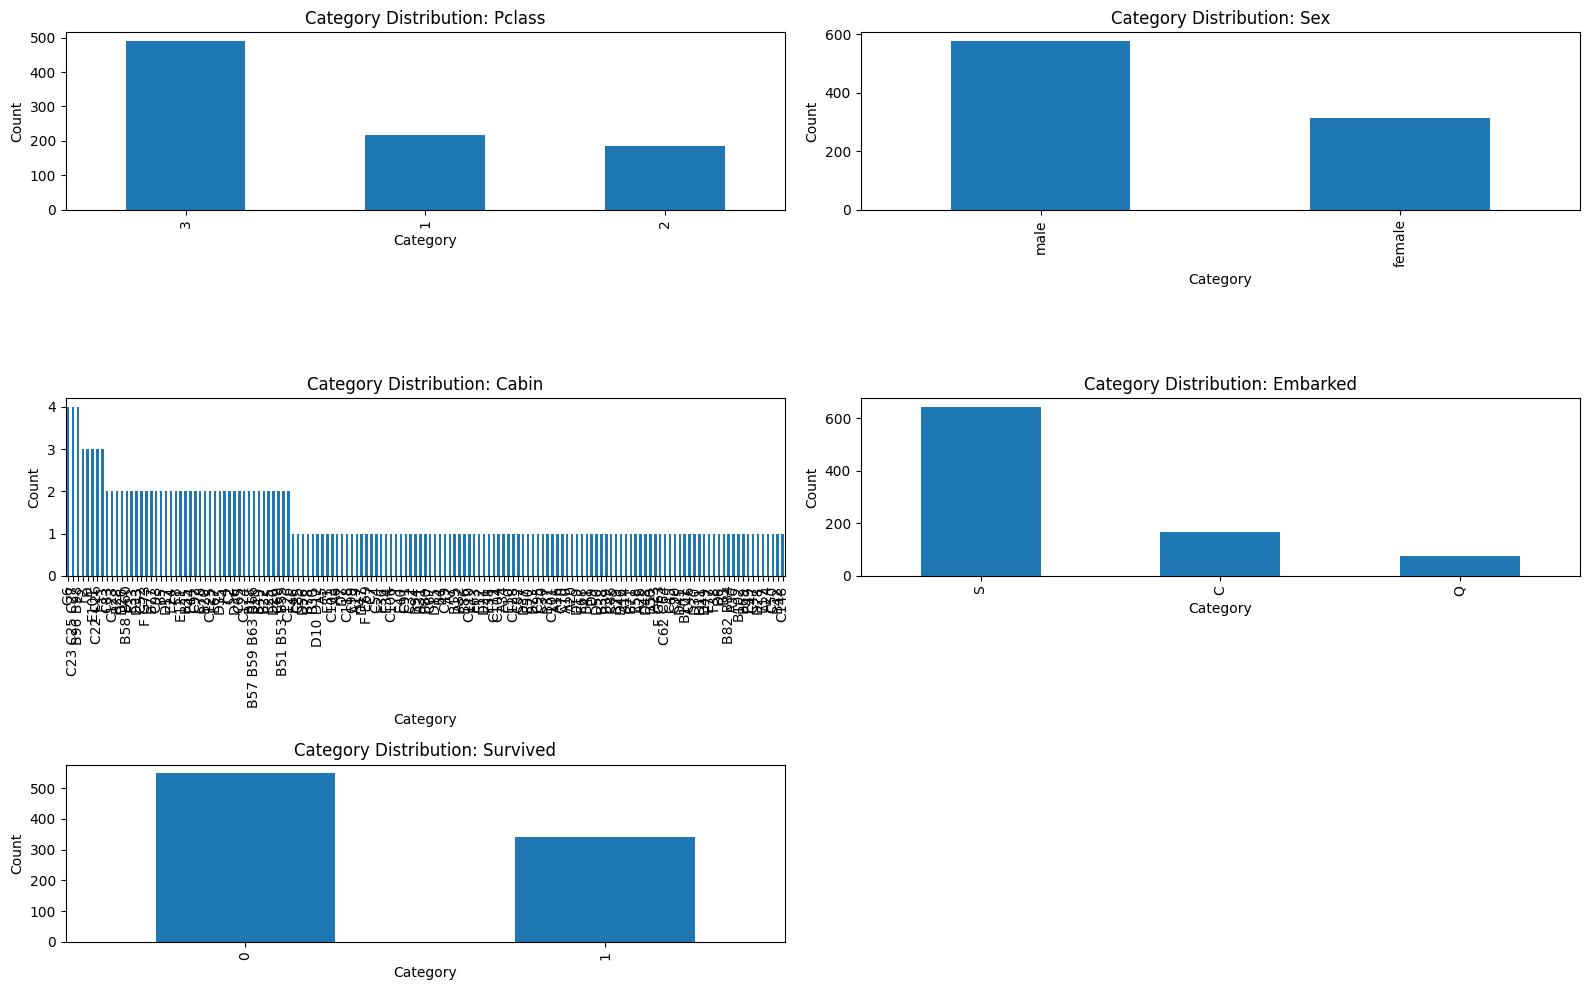

In [179]:
plt.figure(figsize=(16, 10))   # width, height in inches

for i in range(len(cat_fea)):
    plt.subplot(3, 2, i+1)
    train[cat_fea[i]].value_counts().plot(kind='bar')
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(f"Category Distribution: {cat_fea[i]}")

plt.tight_layout()
plt.show()

- `Pclass`: Most passengers are in 3rd class, followed by 1st class, then 2nd class. This indicates that the dataset is dominated by lower-class passengers.
- `Sex`: There are more male passengers than female passengers.
- `Cabin`: Many unique cabin values appear with very low frequencies, indicating high sparsity and many missing or rare categories.
- `Embarked`: Most passengers embarked from S (Southampton), followed by C (Cherbourg) and Q (Queenstown).
- `Survived`: More passengers did not survive than survived, showing class imbalance in the target variable.`

- From the results, **we decided to drop the `Cabin`** feature because it contains a very large number of unique categories, most of which appear only a few times. This high sparsity leads to a high-variance distribution and would introduce high dimensional to our model.

In [ ]:
train1 = train0.drop(columns=["Cabin"])
test1 = test0.drop(columns=["Cabin"])

### **Outlier treatment**

- In this section, we handle outliers in the dataset based on the distribution of each feature.
- Features that contain extreme outliers should be cleaned or treated, as these values can introduce **`bias`** and negatively affect model performance.
- The features that require outlier handling are `SibSp` and `Fare`:
    - From the distribution, `SibSp` contains an outlier around 8.
    - `Fare` shows extreme values around 500.

- Both `SibSp` and `Fare` are highly right-skewed features. Therefore, we consider removing extreme outliers that lie far from the main distribution. Specifically, values greater than `5` for `SibSp` and greater than `300` for `Fare` are treated as outliers.

In [ ]:
sibsp_count = (train1['SibSp'] > 5).sum()
fare_count  = (train1['Fare'] > 300).sum()

print("SibSp > 5:", sibsp_count)
print("Fare > 300:", fare_count)

SibSp > 5: 1
Fare > 300: 3


- If we count the number of `SibSp` values greater than **5**, we find that there are only **8** samples, and these correspond to just 3 distinct values. Therefore, we use **> 5** as a threshold for identifying outliers in `SibSp`.
- In contrast, `Fare` contains extreme values around **550**, which are far from the main distribution and can be considered outliers; thus, we remove these outlier samples.

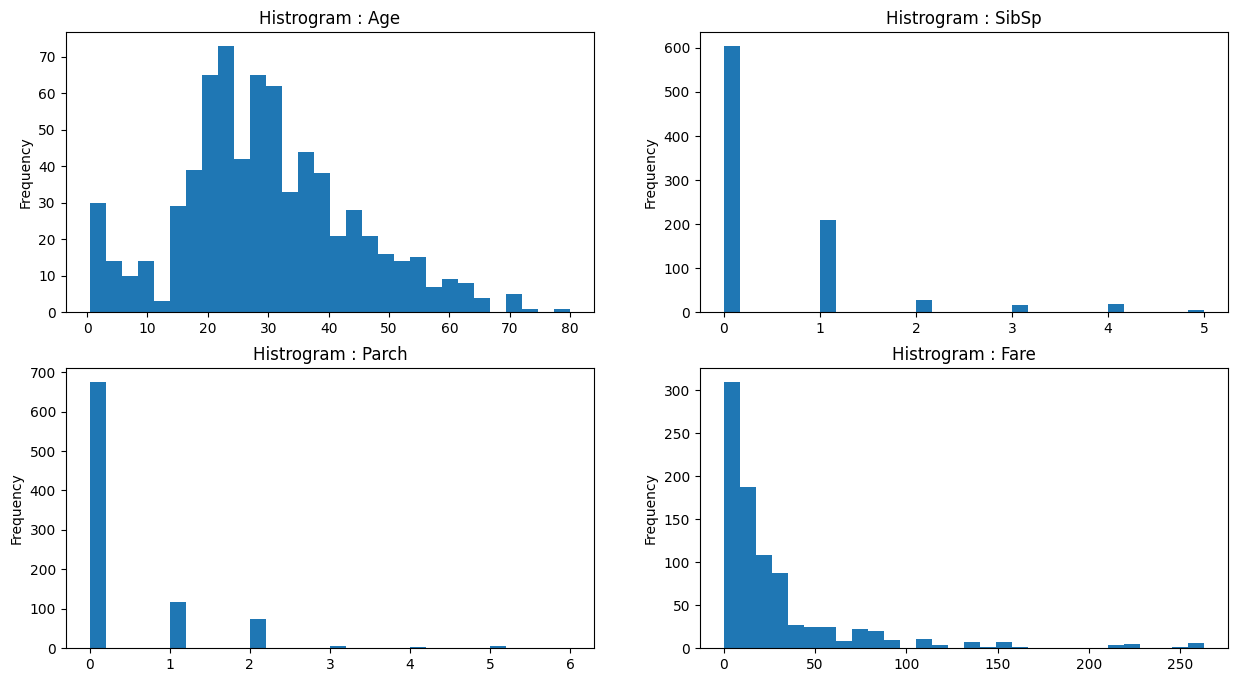

In [183]:
train2 = train1[~((train1['SibSp'] > 5) | (train1['Fare'] > 300))]
plt.figure(figsize=(15, 8))   # width, height in inches
for i in range(len(num_fea)):
    plt.subplot(2,2,i+1)
    train2[num_fea[i]].plot(kind='hist', bins=30,title=f"Histrogram : {num_fea[i]}")

- After outlier treatment the `SibSp`,`Fare` distribution are better than before, but in `Fare` we still can observe the tiny 2 island around 225 and 250

---
---
---